<a href="https://colab.research.google.com/github/nitinsaimajji/voice1/blob/main/week5_update.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
pip install python_speech_features


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for python_speech_features: filename=python_speech_features-0.6-py3-none-any.whl size=5887 sha256=27095c20f69ebe472260fe256d0245b131d09f27846edaab21c368dae14ba99f
  Stored in directory: /root/.cache/pip/wheels/09/a1/04/08e2688d2562d8f9ff89e77c6ddfbf7268e07dae1a6f22455e
Successfully built python_speech_features


In [1]:
!git clone https://github.com/nitinsaimajji/voice1.git

Cloning into 'voice1'...
remote: Enumerating objects: 763, done.
remote: Counting objects: 100% (763/763), done.
remote: Compressing objects: 100% (729/729), done.
remote: Total 763 (delta 77), reused 670 (delta 29), pack-reused 0
Receiving objects: 100% (763/763), 162.60 MiB | 28.11 MiB/s, done.
Resolving deltas: 100% (77/77), done.
Updating files: 100% (1213/1213), done.


In [3]:
!pip install pydub

!pip install python_speech_features

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
import os
import librosa
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from pydub import AudioSegment
from python_speech_features import mfcc
from time import time
import IPython.display as ipd
import librosa
import librosa.display

###                           **WEEK-5**

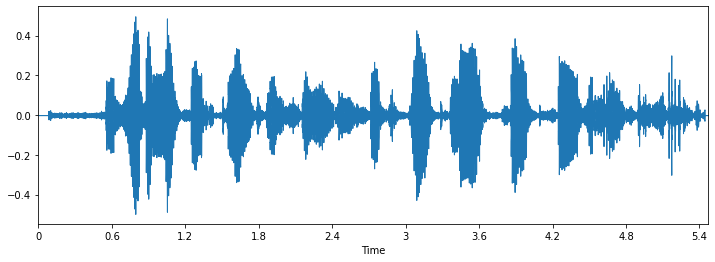

In [56]:
filename = '/content/output.wav'
plt.figure(figsize=(12,4))
data,sample_rate = librosa.load(filename)
_ = librosa.display.waveplot(data,sr=sample_rate)
ipd.Audio(filename)

***A1***

CNN

In [24]:

import os

fulldatasetpath = '/content/voice1/dataset1'

df = pd.read_csv('/content/voice1/wav_check.csv')


features = []


for index, row in df.iterrows():
    
    file_name = os.path.join(os.path.abspath(fulldatasetpath)+'/',str(row["filename"]))
    y, sr = librosa.load(filename, sr=22050)

    n_fft = 2048
    hop_length = 512
    spec = np.abs(librosa.stft(y, n_fft=n_fft, hop_length=hop_length))
    mel_spec = librosa.feature.melspectrogram(S=spec**2, sr=sr, n_fft=n_fft, hop_length=hop_length)
    log_mel_spec = librosa.amplitude_to_db(mel_spec, ref=np.max)

    # Reshaping spectrogram to match input shape of the CNN
    log_mel_spec = np.expand_dims(log_mel_spec, axis=-1)  # add channel dimension
    log_mel_spec = np.expand_dims(log_mel_spec, axis=0)  # add batch dimension

In [25]:
import tensorflow as tf

model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (2, 2), activation='relu', input_shape=log_mel_spec.shape[1:]),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (2, 2), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(128, (2, 2), activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(2, activation='softmax')
])



In [26]:
# Extract intermediate feature maps
layer_names = [layer.name for layer in model.layers]
intermediate_layer_names = layer_names[:-2]  # exclude input and output layers
intermediate_model = tf.keras.Model(inputs=model.input, outputs=[model.get_layer(name).output for name in intermediate_layer_names])
intermediate_outputs = intermediate_model.predict(log_mel_spec)


1/1 [==============================] - 0s 97ms/step


In [27]:
import matplotlib.pyplot as plt

# Define helper function for plotting
def plot_feature_map(feature_map):
    n_maps = feature_map.shape[-1]
    fig, axs = plt.subplots(1, n_maps, figsize=(20, 3))
    for i in range(n_maps):
        axs[i].imshow(feature_map[0, :, :, i], cmap='gray')
        axs[i].axis('off')
    plt.show()

# Visualize intermediate feature maps
for i, feature_map in enumerate(intermediate_outputs):
  if(i<5):
      print(f'Layer {i}: {feature_map.shape}')
      plot_feature_map(feature_map)
  else:
      break;
    


Layer 0: (1, 127, 235, 32)


Layer 1: (1, 63, 117, 32)


Layer 2: (1, 62, 116, 64)


Layer 3: (1, 31, 58, 64)


Layer 4: (1, 30, 57, 128)


In [28]:
import tensorflow as tf

model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=log_mel_spec.shape[1:]),
    tf.keras.layers.AveragePooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.AveragePooling2D((2, 2)),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(2, activation='softmax')
])


In [29]:

layer_names = [layer.name for layer in model.layers]
intermediate_layer_names = layer_names[:-2]  
intermediate_model = tf.keras.Model(inputs=model.input, outputs=[model.get_layer(name).output for name in intermediate_layer_names])
intermediate_outputs = intermediate_model.predict(log_mel_spec)


1/1 [==============================] - 0s 96ms/step


In [30]:
import matplotlib.pyplot as plt


def plot_feature_map(feature_map):
    n_maps = feature_map.shape[-1]
    fig, axs = plt.subplots(1, n_maps, figsize=(20, 3))
    for i in range(n_maps):
        axs[i].imshow(feature_map[0, :, :, i], cmap='gray')
        axs[i].axis('off')
    plt.show()


for i, feature_map in enumerate(intermediate_outputs):
  if(i<5):
      print(f'Layer {i}: {feature_map.shape}')
      plot_feature_map(feature_map)
  else:
      break;
    


Layer 0: (1, 126, 234, 32)


Layer 1: (1, 63, 117, 32)


Layer 2: (1, 61, 115, 64)


Layer 3: (1, 30, 57, 64)


Layer 4: (1, 28, 55, 128)


Q2.

In [102]:
max_pad_len = 174

def extract_features(file_name):
    try:
        audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast') 
        mfccs = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
        
        if mfccs.shape[1] < max_pad_len:
            pad_width = max_pad_len - mfccs.shape[1]
            mfccs = np.pad(mfccs, pad_width=((0, 0), (0, pad_width)), mode='constant')
        else:
            mfccs = mfccs[:, :max_pad_len]
            
    except Exception as e:
        print("Error encountered while parsing file: ", file_name)
        return None 
     
    return mfccs


In [103]:

import os

fulldatasetpath = '/content/voice1/dataset1'

df = pd.read_csv('/content/voice1/wav_check.csv')


features = []


for index, row in df.iterrows():
    
    file_name = os.path.join(os.path.abspath(fulldatasetpath)+'/',str(row["filename"]))
    
    class_label = row["gender"]
    data = extract_features(file_name)
    
    features.append([data, class_label])


featuresdf = pd.DataFrame(features, columns=['feature','class_label'])

print('Finished feature extraction from ', len(featuresdf), ' files') 

Finished feature extraction from  200  files


  **AlexNet**

In [104]:
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical
X = np.array(featuresdf.feature.tolist())
y = np.array(featuresdf.class_label.tolist())
le = LabelEncoder()
yy = to_categorical(le.fit_transform(y)) 
from sklearn.model_selection import train_test_split 

x_train, x_test, y_train, y_test = train_test_split(X, yy, test_size=0.2, random_state = 42)

In [105]:
import keras.layers as layers
import keras.models as models

aln_model = models.Sequential()

# layer 1
aln_model.add(layers.Conv2D(filters=96, kernel_size=11, strides=4, input_shape=(40, 174, 1), activation='relu', padding='valid'))
aln_model.add(layers.MaxPooling2D(pool_size=3, strides=2, padding='valid'))

# layer 2
aln_model.add(layers.Conv2D(filters=256, kernel_size=5, strides=1, activation='relu', padding='same'))
aln_model.add(layers.MaxPooling2D(pool_size=3, strides=2, padding='valid'))

# layer 3
aln_model.add(layers.Conv2D(filters=384, kernel_size=3, strides=1, activation='relu', padding='same'))

# layer 4
aln_model.add(layers.Conv2D(filters=384, kernel_size=3, strides=1, activation='relu', padding='same'))

# layer 5
aln_model.add(layers.Conv2D(filters=256, kernel_size=3, strides=1, activation='relu', padding='same'))

# layer 6
aln_model.add(layers.Flatten())
aln_model.add(layers.Dense(units=4096, activation='relu'))
aln_model.add(layers.Dropout(rate=0.5))

# layer 7
aln_model.add(layers.Dense(units=4096, activation='relu'))
aln_model.add(layers.Dropout(rate=0.5))

# layer 8
aln_model.add(layers.Dense(units=2, activation='softmax'))


In [106]:
aln_model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam') 

In [107]:
aln_model.summary()

score = aln_model.evaluate(x_test, y_test, verbose=1)
accuracy = 100*score[1]

print("Pre-training accuracy: %.4f%%" % accuracy)

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_44 (Conv2D)          (None, 8, 41, 96)         11712     
                                                                 
 max_pooling2d_28 (MaxPoolin  (None, 3, 20, 96)        0         
 g2D)                                                            
                                                                 
 conv2d_45 (Conv2D)          (None, 3, 20, 256)        614656    
                                                                 
 max_pooling2d_29 (MaxPoolin  (None, 1, 9, 256)        0         
 g2D)                                                            
                                                                 
 conv2d_46 (Conv2D)          (None, 1, 9, 384)         885120    
                                                                 
 conv2d_47 (Conv2D)          (None, 1, 9, 384)       

In [108]:
from keras.callbacks import ModelCheckpoint 
from datetime import datetime 

num_epochs = 30
num_batch_size = 256

checkpointer = ModelCheckpoint(filepath='saved_models/weights.best.basic_cnn.hdf5', 
                               verbose=1, save_best_only=True)
start = datetime.now()

history =aln_model.fit(x_train, y_train, batch_size=num_batch_size, epochs=num_epochs, validation_data=(x_test, y_test), callbacks=[checkpointer], verbose=1)

duration = datetime.now() - start
print("Training completed in time: ", duration)

Epoch 1/30
1/1 [==============================] - ETA: 0s - loss: 0.7124 - accuracy: 0.5250
Epoch 1: val_loss improved from inf to 5.67611, saving model to saved_models/weights.best.basic_cnn.hdf5
1/1 [==============================] - 5s 5s/step - loss: 0.7124 - accuracy: 0.5250 - val_loss: 5.6761 - val_accuracy: 0.4750
Epoch 2/30
1/1 [==============================] - ETA: 0s - loss: 5.3108 - accuracy: 0.5063
Epoch 2: val_loss did not improve from 5.67611
1/1 [==============================] - 3s 3s/step - loss: 5.3108 - accuracy: 0.5063 - val_loss: 33.4870 - val_accuracy: 0.5250
Epoch 3/30
1/1 [==============================] - ETA: 0s - loss: 33.9470 - accuracy: 0.4938
Epoch 3: val_loss improved from 5.67611 to 1.59776, saving model to saved_models/weights.best.basic_cnn.hdf5
1/1 [==============================] - 4s 4s/step - loss: 33.9470 - accuracy: 0.4938 - val_loss: 1.5978 - val_accuracy: 0.5250
Epoch 4/30
1/1 [==============================] - ETA: 0s - loss: 1.6686 - accurac

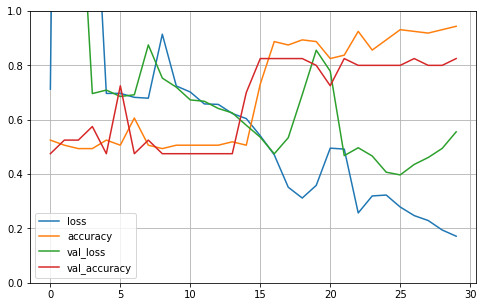

1. If the validation loss is greater(are both high:) than the training loss. The model is underfitting.
2. If the validation loss is greater than the training loss,The model is overfitting.
3. If the training loss and validation loss both decrease and stabilize at a specific point:the model is good fit


In [109]:
import pandas as pd
import numpy as np
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()
print('1. If the validation loss is greater(are both high:) than the training loss. The model is underfitting.')
print('2. If the validation loss is greater than the training loss,The model is overfitting.')
print('3. If the training loss and validation loss both decrease and stabilize at a specific point:the model is good fit')

In [110]:
from pydub import AudioSegment

# set the file paths
input_file = "/content/sample-195283.mp3"
output_file = "/content/output.wav"

audio = AudioSegment.from_file(input_file, format="mp3")

audio.export(output_file, format="wav")


<_io.BufferedRandom name='/content/output.wav'>

In [111]:
def print_prediction(file_name):
    prediction_feature = extract_features(file_name) 
    prediction_feature = prediction_feature.reshape(1, num_rows, num_columns, num_channels)

    predicted_vector = aln_model.predict(prediction_feature)
    predicted_class = le.inverse_transform(np.argmax(predicted_vector, axis=-1)) 
    print("The predicted class is:", predicted_class[0], '\n') 

    predicted_proba_vector = predicted_vector
    for i in range(len(predicted_proba_vector[0])): 
        category = le.inverse_transform(np.array([i]))
        print(category[0], "\t\t : ", format(predicted_proba_vector[0][i]*100,'.32f'),"%")

In [112]:
filename = '/content/output.wav' 
print_prediction(filename) 

1/1 [==============================] - 0s 132ms/step
The predicted class is: female 

female 		 :  93.64431500434875488281250000000000 %
male 		 :  6.35568797588348388671875000000000 %


In [113]:
filename = '/content/output.wav'
plt.figure(figsize=(12,4))
data,sample_rate = librosa.load(filename)
ipd.Audio(filename)

<Figure size 864x288 with 0 Axes>

VGG

In [114]:
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical
X = np.array(featuresdf.feature.tolist())
y = np.array(featuresdf.class_label.tolist())
le = LabelEncoder()
yy = to_categorical(le.fit_transform(y)) 
from sklearn.model_selection import train_test_split 

x_train, x_test, y_train, y_test = train_test_split(X, yy, test_size=0.2, random_state = 42)

In [115]:
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Conv2D, MaxPooling2D
from keras.layers import Flatten, Dense, Dropout, Activation, BatchNormalization

num_rows = 40
num_columns = 174
num_channels = 1

x_train = x_train.reshape(x_train.shape[0], num_rows, num_columns, num_channels)
x_test = x_test.reshape(x_test.shape[0], num_rows, num_columns, num_channels)

num_labels = yy.shape[1]
filter_size = 2

vgg_model = Sequential()

# 1D convolutional layer
vgg_model.add(Conv1D(64, 3, padding='same',input_shape=(num_rows, num_columns, num_channels), activation='relu'))
vgg_model.add(BatchNormalization())

# 1D max pooling layer
vgg_model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

# 1D convolutional layer
vgg_model.add(Conv1D(128, 3, padding='same',activation='relu'))
vgg_model.add(BatchNormalization())

# 1D max pooling layer
vgg_model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

# 2D convolutional layer
vgg_model.add(Conv2D(256, (3, 3), padding='same',activation='relu'))

vgg_model.add(BatchNormalization())

# 2D max pooling layer
vgg_model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

# 2D convolutional layer
vgg_model.add(Conv2D(512, (3, 3), padding='same',activation='relu'))

vgg_model.add(BatchNormalization())

# 2D max pooling layer
vgg_model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

# Flatten layer
vgg_model.add(Flatten())

# Fully connected layer
vgg_model.add(Dense(512,activation='relu'))

vgg_model.add(Dropout(0.5))

# Output layer
vgg_model.add(Dense(2,activation='softmax'))

# Compile the model
vgg_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [116]:
# Compile the model
vgg_model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam') 

In [117]:
# Display model architecture summary 
vgg_model.summary()

# Calculate pre-training accuracy 
score = vgg_model.evaluate(x_test, y_test, verbose=1)
accuracy = 100*score[1]

print("Pre-training accuracy: %.4f%%" % accuracy)

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_37 (Conv1D)          (None, 40, 174, 64)       256       
                                                                 
 batch_normalization_19 (Bat  (None, 40, 174, 64)      256       
 chNormalization)                                                
                                                                 
 max_pooling2d_30 (MaxPoolin  (None, 20, 87, 64)       0         
 g2D)                                                            
                                                                 
 conv1d_38 (Conv1D)          (None, 20, 87, 128)       24704     
                                                                 
 batch_normalization_20 (Bat  (None, 20, 87, 128)      512       
 chNormalization)                                                
                                                     

In [118]:
from keras.callbacks import ModelCheckpoint 
from datetime import datetime 

num_epochs = 30
num_batch_size = 256

checkpointer = ModelCheckpoint(filepath='saved_models/weights.best.basic_cnn.hdf5', 
                               verbose=1, save_best_only=True)
start = datetime.now()

history =vgg_model.fit(x_train, y_train, batch_size=num_batch_size, epochs=num_epochs, validation_data=(x_test, y_test), callbacks=[checkpointer], verbose=1)

duration = datetime.now() - start
print("Training completed in time: ", duration)

Epoch 1/30
1/1 [==============================] - ETA: 0s - loss: 1.4392 - accuracy: 0.5813
Epoch 1: val_loss improved from inf to 72.11192, saving model to saved_models/weights.best.basic_cnn.hdf5
1/1 [==============================] - 10s 10s/step - loss: 1.4392 - accuracy: 0.5813 - val_loss: 72.1119 - val_accuracy: 0.5250
Epoch 2/30
1/1 [==============================] - ETA: 0s - loss: 22.2578 - accuracy: 0.4938
Epoch 2: val_loss improved from 72.11192 to 56.30577, saving model to saved_models/weights.best.basic_cnn.hdf5
1/1 [==============================] - 8s 8s/step - loss: 22.2578 - accuracy: 0.4938 - val_loss: 56.3058 - val_accuracy: 0.4750
Epoch 3/30
1/1 [==============================] - ETA: 0s - loss: 22.1159 - accuracy: 0.5063
Epoch 3: val_loss improved from 56.30577 to 42.14544, saving model to saved_models/weights.best.basic_cnn.hdf5
1/1 [==============================] - 7s 7s/step - loss: 22.1159 - accuracy: 0.5063 - val_loss: 42.1454 - val_accuracy: 0.4750
Epoch 4/3

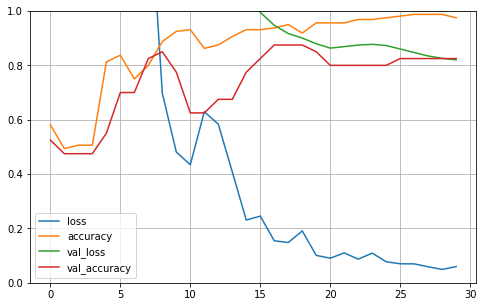

1. If the validation loss is greater(are both high:) than the training loss. The model is underfitting.
2. If the validation loss is greater than the training loss,The model is overfitting.
3. If the training loss and validation loss both decrease and stabilize at a specific point:the model is good fit


In [119]:
import pandas as pd
import numpy as np
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()
print('1. If the validation loss is greater(are both high:) than the training loss. The model is underfitting.')
print('2. If the validation loss is greater than the training loss,The model is overfitting.')
print('3. If the training loss and validation loss both decrease and stabilize at a specific point:the model is good fit')

In [120]:
def print_prediction(file_name):
    prediction_feature = extract_features(file_name) 
    prediction_feature = prediction_feature.reshape(1, num_rows, num_columns, num_channels)

    predicted_vector = model.predict(prediction_feature)
    predicted_class = le.inverse_transform(np.argmax(predicted_vector, axis=-1)) 
    print("The predicted class is:", predicted_class[0], '\n') 

    predicted_proba_vector = predicted_vector
    for i in range(len(predicted_proba_vector[0])): 
        category = le.inverse_transform(np.array([i]))
        print(category[0], "\t\t : ", format(predicted_proba_vector[0][i]*100,'.32f'),"%")

In [123]:
from pydub import AudioSegment

# set the file paths
input_file = "/content/sample-195283.mp3"
output_file = "/content/output.wav"

audio = AudioSegment.from_file(input_file, format="mp3")

audio.export(output_file, format="wav")


<_io.BufferedRandom name='/content/output.wav'>

In [124]:
filename = '/content/output.wav' 
print_prediction(filename) 

1/1 [==============================] - 0s 85ms/step
The predicted class is: female 

female 		 :  98.87875914573669433593750000000000 %
male 		 :  1.12124476581811904907226562500000 %


In [125]:
filename = '/content/output.wav'
plt.figure(figsize=(12,4))
data,sample_rate = librosa.load(filename)
ipd.Audio(filename)

<Figure size 864x288 with 0 Axes>